In [1]:
# IMPORTAÇÃO DAS BIBLIOTECAS

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [3]:
# LEITURA DOS DADOS
arquivo = 'heart_attack_data.csv'
df = pd.read_csv(arquivo, encoding='utf-8')
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
# ANALISE DE TIPOS E QUANTIDADES

print(f"Objetos: {df.shape[0]}")
print(f"Atributos: {df.shape[1]}")
print(df.dtypes)
print(df.describe().round(0))


Objetos: 303
Atributos: 14
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
         age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
count  303.0  303.0  303.0     303.0  303.0  303.0    303.0    303.0  303.0   
mean    54.0    1.0    1.0     132.0  246.0    0.0      1.0    150.0    0.0   
std      9.0    0.0    1.0      18.0   52.0    0.0      1.0     23.0    0.0   
min     29.0    0.0    0.0      94.0  126.0    0.0      0.0     71.0    0.0   
25%     48.0    0.0    0.0     120.0  211.0    0.0      0.0    134.0    0.0   
50%     55.0    1.0    1.0     130.0  240.0    0.0      1.0    153.0    0.0   
75%     61.0    1.0    2.0     140.0  274.0    0.0      1.0    166.0    1.0   
max     77.0    1.0    3.0     200.0  564.0    

/var/folders/wr/8266ph5s58sgshq9h13wj9jm0000gn/T/ipykernel_3110/1279679658.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados_colesterol, labels=labels)


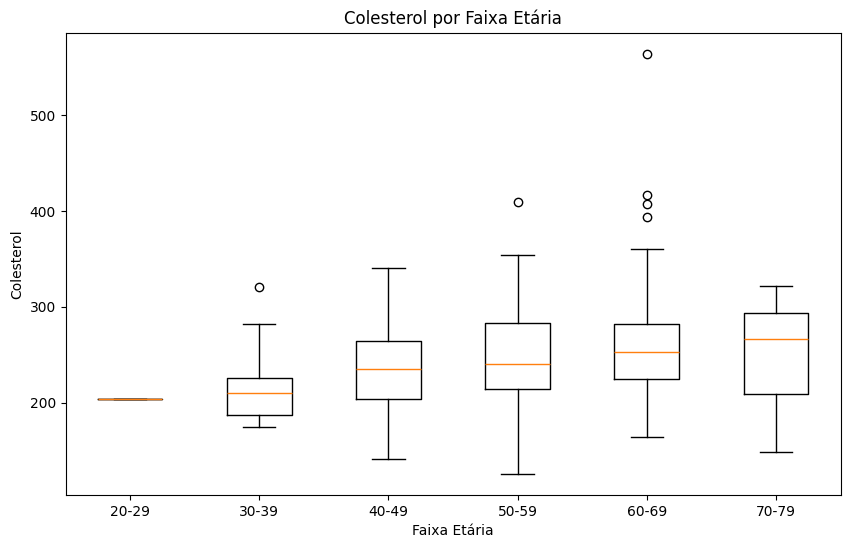

In [5]:
# BOXPLOT ANALÍTICO (COLESTEROL x FAIXA ETÁRIA)

bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

dados_colesterol = [df[df['age_group'] == age_group]['chol'] for age_group in labels]
plt.figure(figsize=(10, 6))
plt.boxplot(dados_colesterol, labels=labels)
plt.title('Colesterol por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Colesterol')
plt.show()


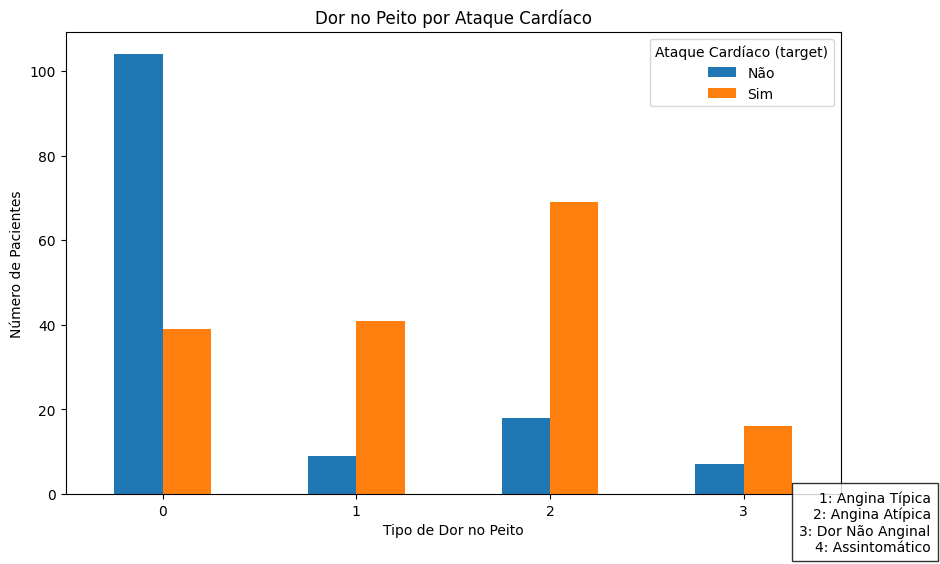

In [6]:
# GRÁFICO EM BARRAS (DOR NO PEITO x ATAQUE CARDÍACO)

contagem = df.groupby(['cp', 'target']).size().unstack()
contagem.plot(kind='bar', figsize=(10, 6))
plt.title('Dor no Peito por Ataque Cardíaco')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Número de Pacientes')
plt.xticks(ticks=range(len(contagem.index)), labels=contagem.index, rotation=0)
plt.legend(title='Ataque Cardíaco (target)', labels=['Não', 'Sim'])

legenda = (
    "1: Angina Típica\n"
    "2: Angina Atípica\n"
    "3: Dor Não Anginal\n"
    "4: Assintomático"
)

plt.figtext(
    0.99, 0.01, legenda, 
    horizontalalignment='right', 
    verticalalignment='bottom',
    fontsize=10, 
    bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5}
)
plt.show()


In [7]:
# SELEÇÃO DAS VARIÁVEIS E CATEGORIAS

X = df[['age', 'cp', 'chol']] 
y = df['target'] 

one_hot_data = pd.get_dummies(X[['cp']], drop_first=True)
X_encoded = pd.concat([X[['age', 'chol']], one_hot_data], axis=1)
